In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa 
import librosa.display
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [42]:
audioname = '/kaggle/input/urbansound8k/fold1/101415-3-0-8.wav'
audiof1, sr = librosa.load(audioname)
print('Audio information:\n')
print("Sample Rate: ", sr)
print("Audio Shape: ", audiof1.shape)
print("Duration (secs): ", len(audiof1)/sr)
print("Min Amplitude: ", np.min(audiof1))
print("Max Amplitude: ", np.max(audiof1))
print("Mean Amplitude: ", np.mean(audiof1))
print(f'Audio data: {audiof1}')


Audio information:

Sample Rate:  22050
Audio Shape:  (88200,)
Duration (secs):  4.0
Min Amplitude:  -0.7972461
Max Amplitude:  0.7773354
Mean Amplitude:  -2.5418229e-05
Audio data: [ 0.23264292  0.3517679   0.29677212 ... -0.002873   -0.00120905
 -0.00118477]


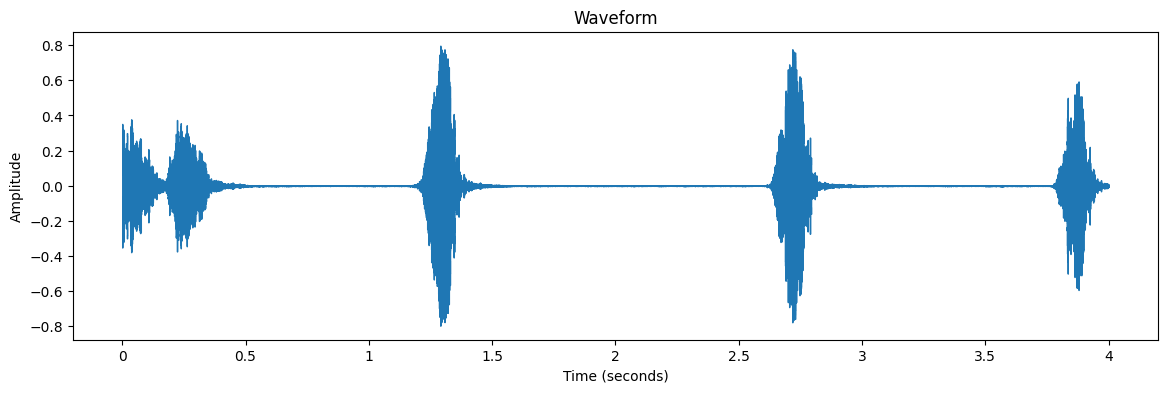

In [43]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(audiof1, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

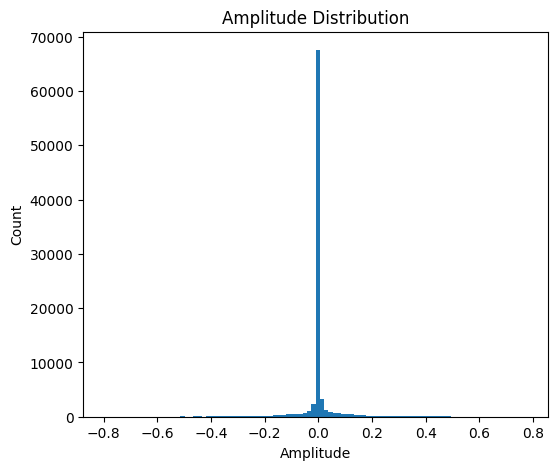

In [44]:
plt.figure(figsize=(6,5))
plt.hist(audiof1, bins=100)
plt.title("Amplitude Distribution")
plt.xlabel("Amplitude")
plt.ylabel("Count")
plt.show()

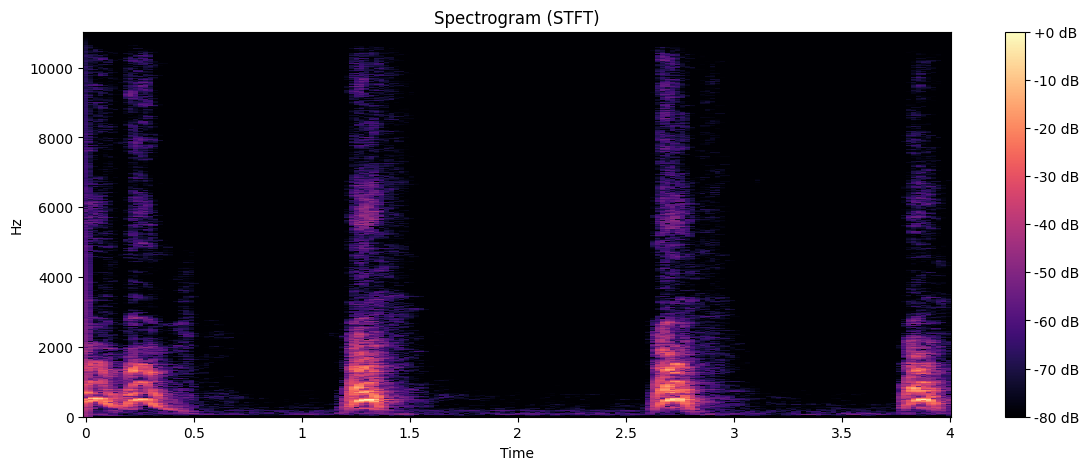

In [45]:
# Spectrogram (STFT)
D = librosa.stft(audiof1)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (STFT)")
plt.show()

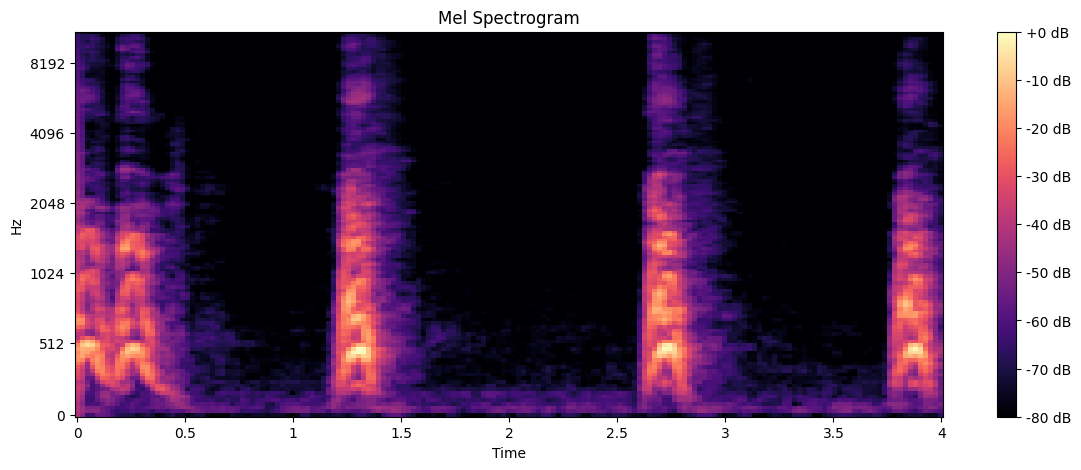

In [46]:
#  Mel-Spectrogram
mel_spec = librosa.feature.melspectrogram(y=audiof1, sr=sr, n_mels=128)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.show()

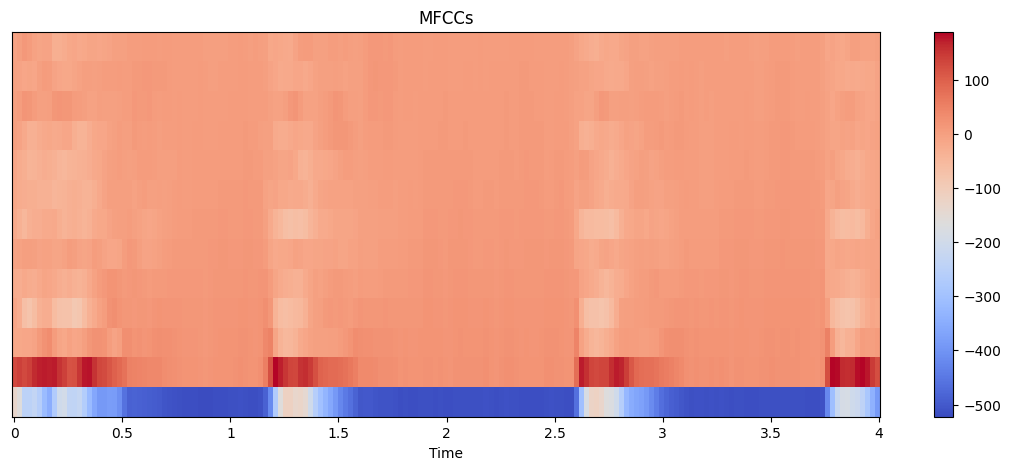

MFCC shape: (13, 173)


In [47]:
mfcc = librosa.feature.mfcc(y=audiof1, sr=sr, n_mfcc=13)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title("MFCCs")
plt.show()

print("MFCC shape:", mfcc.shape)

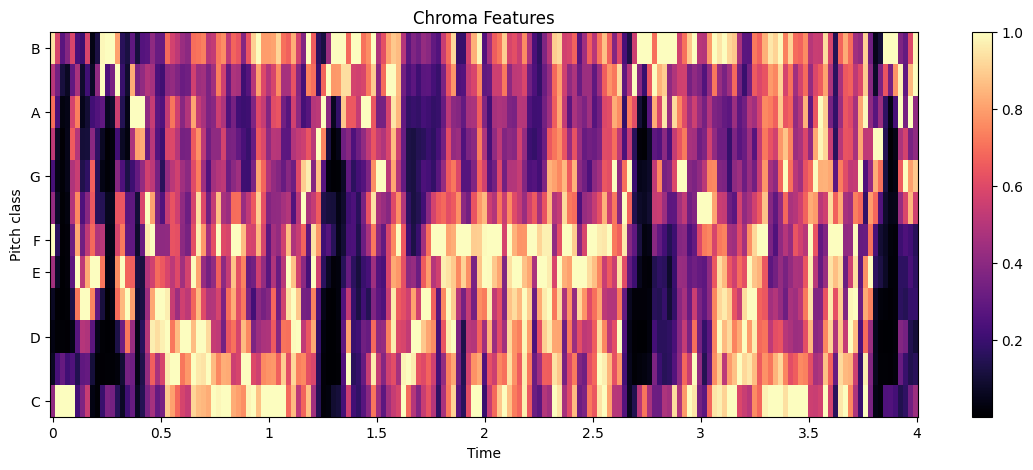

In [48]:
# Chroma Features
chroma = librosa.feature.chroma_stft(y=audiof1, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

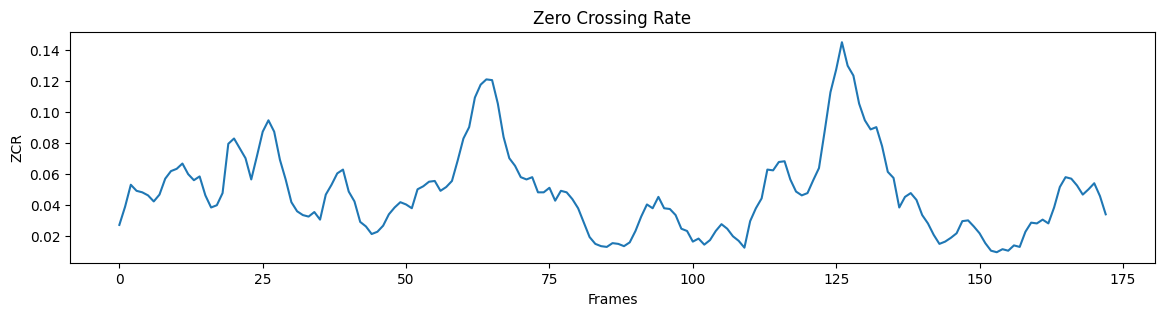

In [49]:
# Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(audiof1)

plt.figure(figsize=(14, 3))
plt.plot(zcr[0])
plt.title("Zero Crossing Rate")
plt.xlabel("Frames")
plt.ylabel("ZCR")
plt.show()

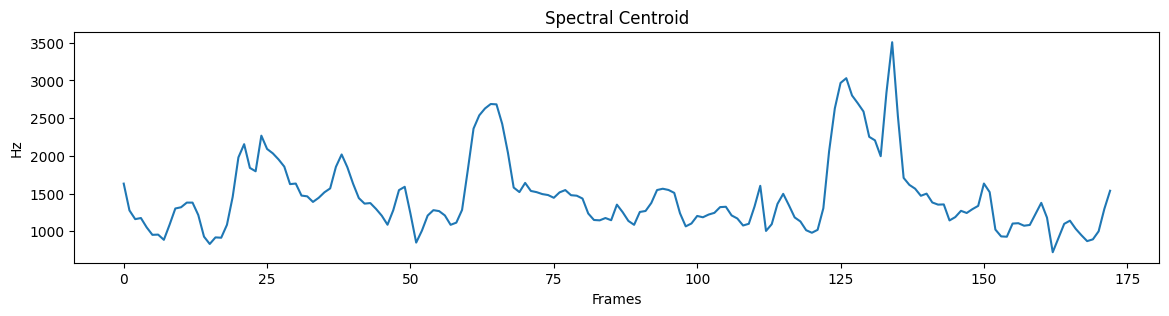

In [50]:
#Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=audiof1, sr=sr)

plt.figure(figsize=(14, 3))
plt.plot(spectral_centroid[0])
plt.title("Spectral Centroid")
plt.xlabel("Frames")
plt.ylabel("Hz")
plt.show()

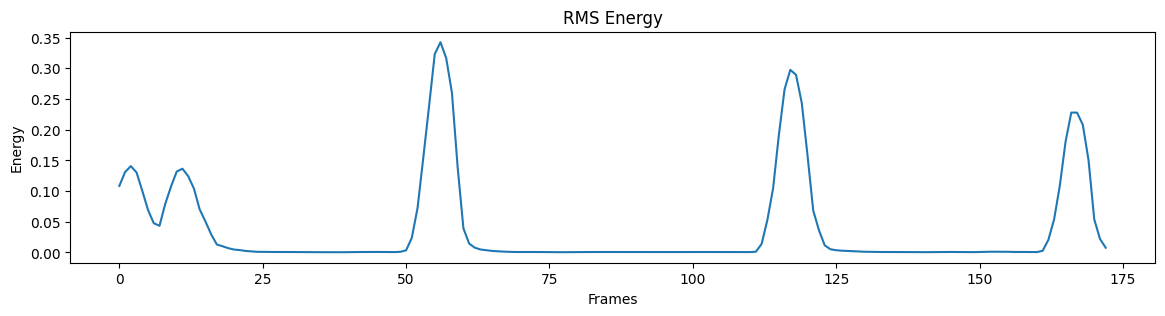

In [51]:
#  RMS Energy
rms = librosa.feature.rms(y=audiof1)

plt.figure(figsize=(14, 3))
plt.plot(rms[0])
plt.title("RMS Energy")
plt.xlabel("Frames")
plt.ylabel("Energy")
plt.show()

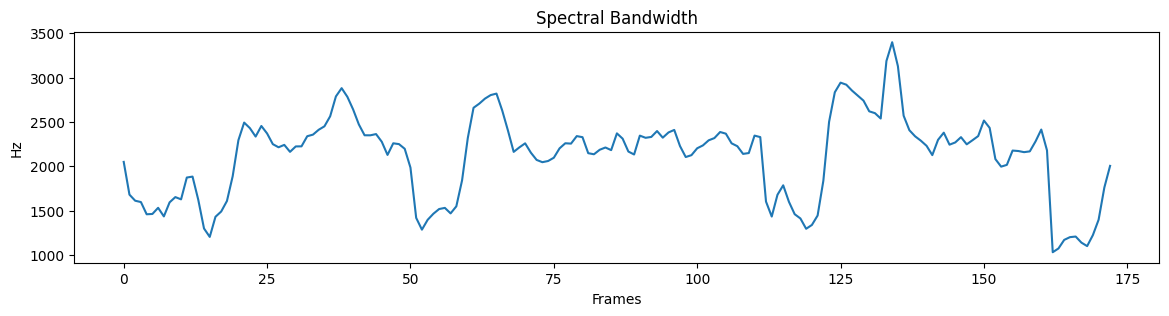

In [52]:
# Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audiof1, sr=sr)

plt.figure(figsize=(14, 3))
plt.plot(spectral_bandwidth[0])
plt.title("Spectral Bandwidth")
plt.xlabel("Frames")
plt.ylabel("Hz")
plt.show()

audio: [10955 10850 10679 ...   -42   -31   -30], 
 sample rate: 48000


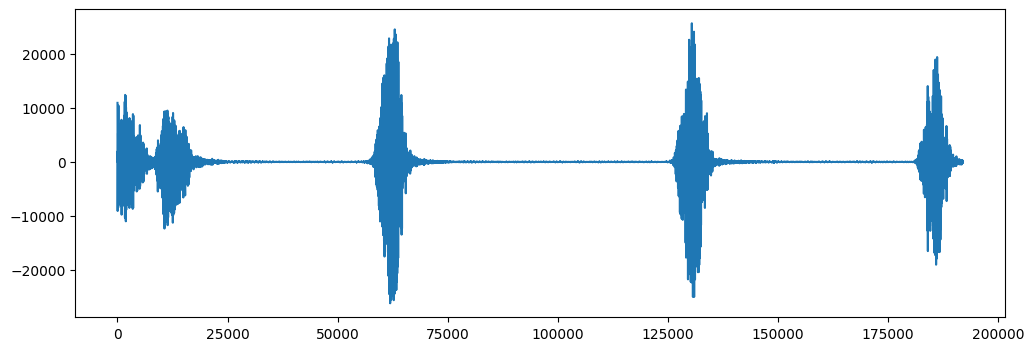

In [53]:
from scipy.io import wavfile as wav
wsr, waudio = wav.read(audioname)
print(f'audio: {waudio}, \n sample rate: {wsr}')
plt.figure(figsize=(12,4))
plt.plot(waudio)
plt.show()

In [54]:
metadata = pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')
print("Shape: ", metadata.shape)
metadata.head()

Shape:  (8732, 8)


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [55]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


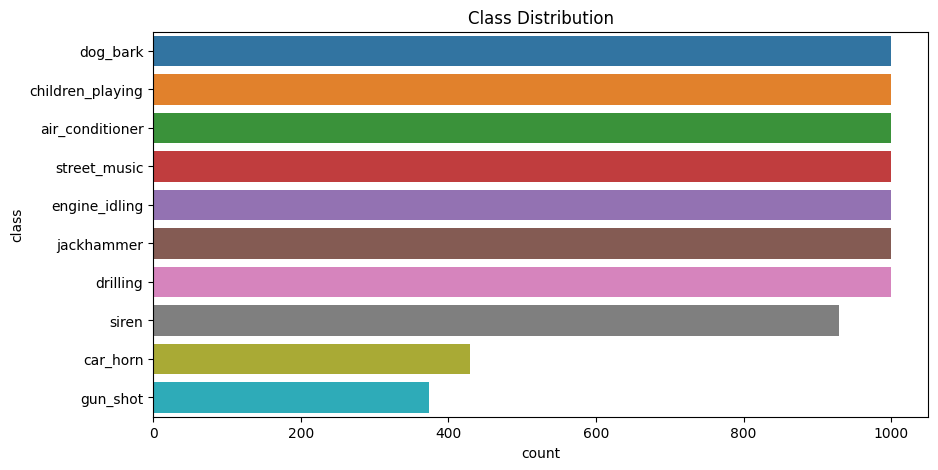

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(y=metadata['class'], order=metadata['class'].value_counts().index)
plt.title("Class Distribution")
plt.show()

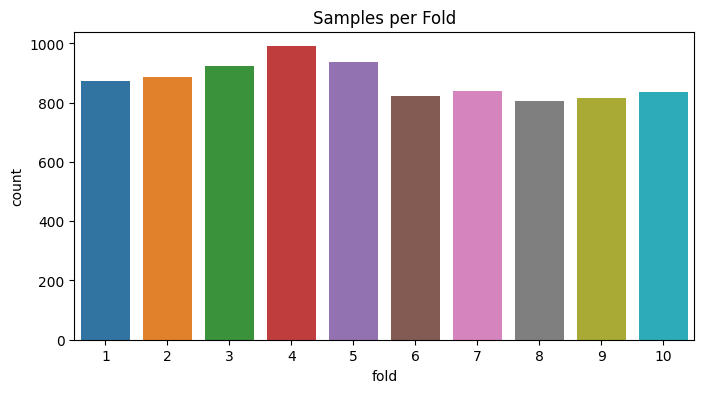

In [57]:
plt.figure(figsize=(8,4))
sns.countplot(x=metadata['fold'])
plt.title("Samples per Fold")
plt.show()

In [58]:
metadata.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [59]:
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

**Data Preprocessing**

In [60]:
mfccs = librosa.feature.mfcc(y=audiof1, sr=sr, n_mfcc=50)
print("Shape: ", mfccs.shape)
print(mfccs)

Shape:  (50, 173)
[[-1.3384369e+02 -1.6187689e+02 -2.4668971e+02 ... -2.8643549e+02
  -3.3991559e+02 -3.8729968e+02]
 [ 1.2751001e+02  1.3888113e+02  1.2948892e+02 ...  1.7526721e+02
   1.4579324e+02  1.2255610e+02]
 [-1.5061155e+01 -1.6489908e+01 -1.2738588e+01 ...  2.4270892e-01
   2.0795932e+00  7.1689463e+00]
 ...
 [ 3.9059383e-01  3.8846707e+00  1.8233244e+00 ... -6.5136170e-01
  -1.6307625e-01 -1.1610637e+00]
 [-1.4174571e+00  5.5207473e-01 -7.9029961e+00 ... -1.7759895e+00
  -3.6275783e+00 -6.6611910e+00]
 [ 8.4054267e-01  2.0561805e+00  7.4989557e-01 ... -2.4885907e+00
  -1.7628806e+00 -4.3544860e+00]]


In [62]:
def feature_extractor(file):
    audio, _ = librosa.load(file)
    mfccs_feature = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=50)
    scaled_mfccs = np.mean(mfccs_feature.T, axis=0)
    return scaled_mfccs
    

In [66]:
audio_dataset_path='../input/urbansound8k/'

In [64]:
import os
from tqdm import tqdm

In [68]:
extracted_features = []
for i, row in tqdm(metadata.iterrows()):
    audio_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    class_label = row['class']
    mfccs = feature_extractor(audio_name)
    extracted_features.append([mfccs, class_label])

8732it [05:18, 27.38it/s]


In [70]:
# Convert this extracted features to dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581215, -122.81315, -60.74529,...",dog_bark
1,"[-417.00516, 99.336624, -42.995583, 51.073326,...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63867, 103.86224, -42.658783, 50.690285,...",children_playing


In [71]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [74]:
import tensorflow as tf
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = "python"

In [75]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [76]:
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [78]:
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ",X_test.shape[0])

Number of training samples =  7422
Number of testing samples =  1310


In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report

In [81]:
num_labels = y.shape[1]

In [83]:
model = Sequential()
model.add(Dense(256, input_shape=(50,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256, input_shape=(50,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [84]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 256)            │        13,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,826 (698.54 KB)

 Trainable params: 178,826 (698.54 KB)

 Non-trainable params: 0 (0.00 B)

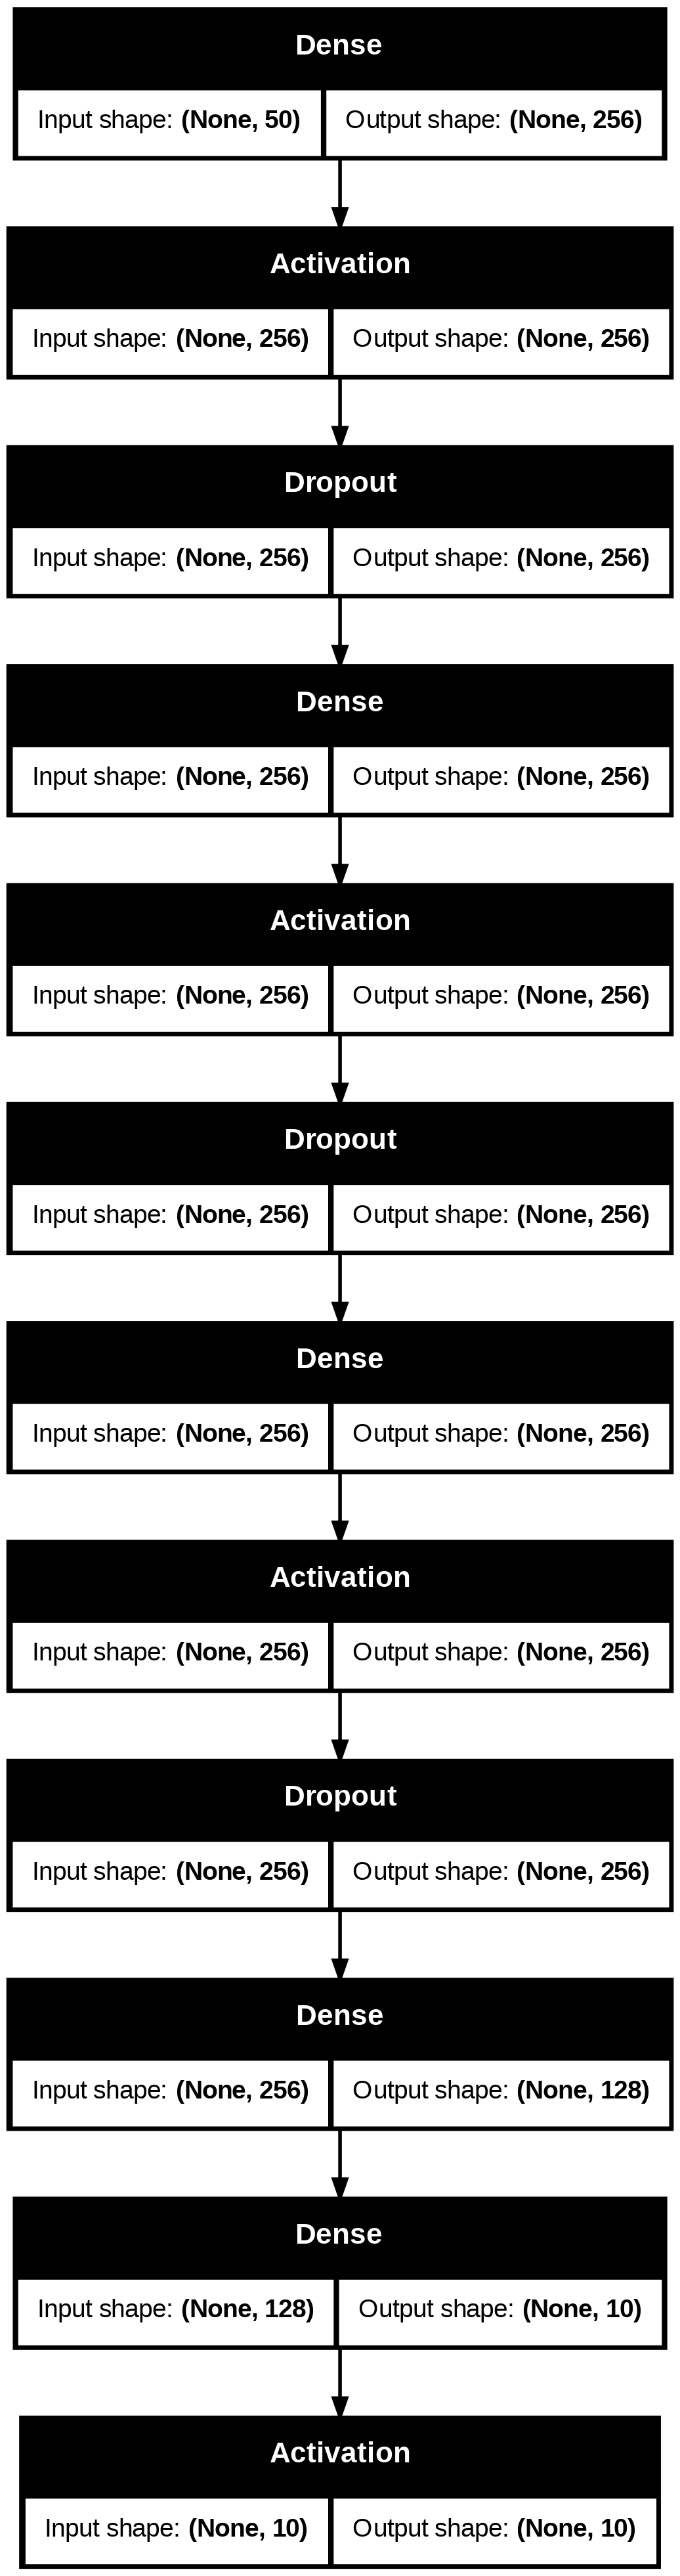

In [85]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [86]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam')

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 150
num_batch_size = 32

In [88]:
training = model.fit(X_train,
                     y_train,
                     batch_size=num_batch_size,
                     epochs=num_epochs,
                    validation_data=(X_test,y_test))

Epoch 1/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1305 - loss: 15.5102 - val_accuracy: 0.1473 - val_loss: 2.2409
Epoch 2/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1703 - loss: 2.3974 - val_accuracy: 0.1542 - val_loss: 2.2040
Epoch 3/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1935 - loss: 2.2121 - val_accuracy: 0.2023 - val_loss: 2.0553
Epoch 4/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2435 - loss: 2.0712 - val_accuracy: 0.3366 - val_loss: 1.9121
Epoch 5/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3111 - loss: 1.9449 - val_accuracy: 0.4290 - val_loss: 1.7184
Epoch 6/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3635 - loss: 1.8241 - val_accuracy: 0.4534 - val_loss: 1.5972
Epoch 7/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4010 - loss: 1.6900 - val_accuracy: 0.5115 - val_loss: 1.4850
Epoch 8/150
232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4437 - loss: 1.6115 - val_acc

In [89]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8916030526161194


In [90]:
train_hist = pd.DataFrame(training.history)
train_hist

,accuracy,loss,val_accuracy,val_loss
0,0.146726,7.375472,0.147328,2.240882
1,0.180140,2.344381,0.154198,2.203974
2,0.201024,2.174065,0.202290,2.055306
3,0.262598,2.042540,0.336641,1.912068
4,0.321881,1.916422,0.429008,1.718355
...,...,...,...,...
145,0.852061,0.458029,0.896183,0.369477
146,0.853544,0.487810,0.894656,0.386521
147,0.858798,0.473187,0.890840,0.390407
148,0.848828,0.480023,0.895420,0.372756


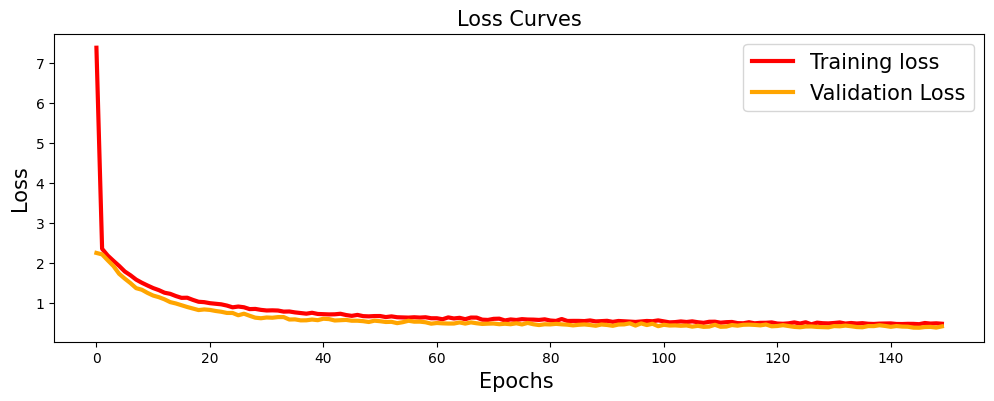

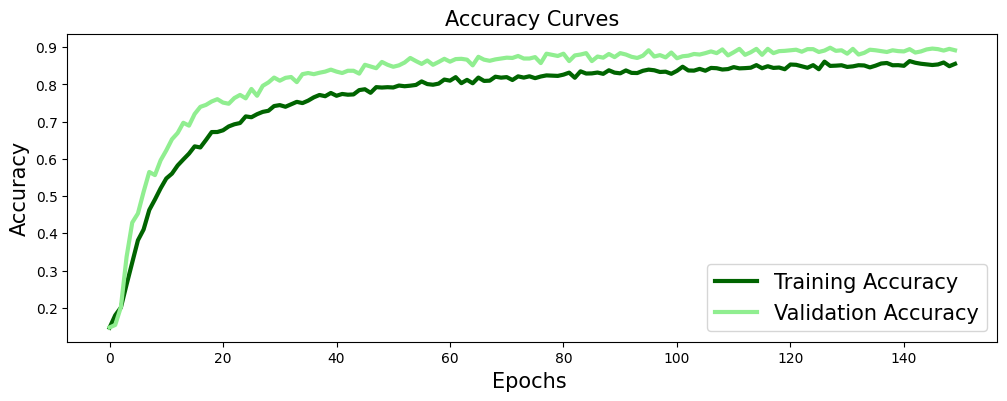

In [91]:
# Loss curves
plt.figure(figsize=[12,4])
plt.plot(training.history['loss'],'red',linewidth=3.0)
plt.plot(training.history['val_loss'],'orange',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title('Loss Curves',fontsize=15)


# Accuracy Curves
plt.figure(figsize=[12,4])
plt.plot(training.history['accuracy'],'darkgreen',linewidth=3.0)
plt.plot(training.history['val_accuracy'],'lightgreen',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy Curves',fontsize=15)
plt.show()

In [92]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [93]:
from sklearn.metrics import confusion_matrix, classification_report
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))


Confusion Matrix :


[[146   0   7   0   0   4   0   0   0   2]
 [  0  50   3   2   2   1   0   1   1   4]
 [  3   0 131   3   1   0   1   0   1   7]
 [  4   0   8 127   0   0   2   0   1   4]
 [  1   0   7   1 136   1   0   4   0   5]
 [  2   0   1   0   0 140   0   0   0   0]
 [  2   0   3   6   0   0  37   1   0   0]
 [  0   0   0   0   1   0   0 149   0   1]
 [  0   0   4   2   0   1   0   0 117   0]
 [  8   0  20   2   1   4   0   2   0 135]]


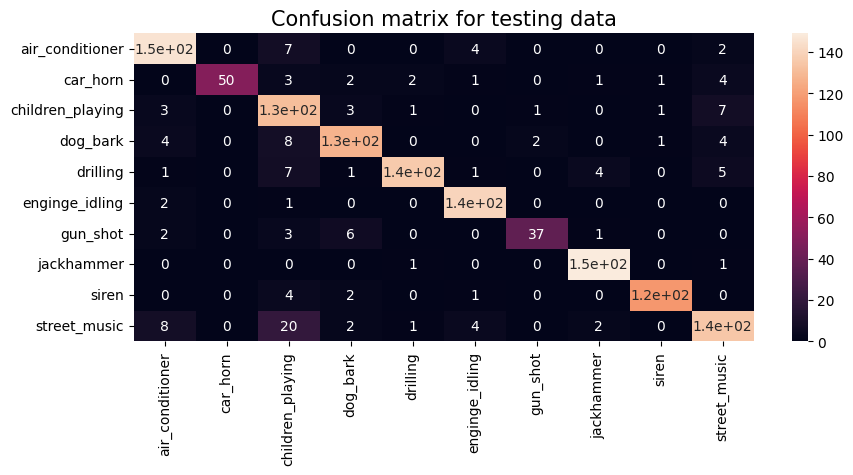

In [94]:
plt.figure(figsize=(10,4))
plt.title("Confusion matrix for testing data", fontsize = 15)
plt.xlabel("Predicted class")
plt.ylabel("True class")
sns.heatmap(confusion_matrix(ytrue,ypred),annot=True,
           xticklabels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'enginge_idling', 'gun_shot', 'jackhammer', 'siren','street_music'],
           yticklabels=['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'enginge_idling', 'gun_shot', 'jackhammer', 'siren','street_music'])

plt.show()

In [95]:
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))



Classification Report : 

               precision    recall  f1-score   support

           0       0.88      0.92      0.90       159
           1       1.00      0.78      0.88        64
           2       0.71      0.89      0.79       147
           3       0.89      0.87      0.88       146
           4       0.96      0.88      0.92       155
           5       0.93      0.98      0.95       143
           6       0.93      0.76      0.83        49
           7       0.95      0.99      0.97       151
           8       0.97      0.94      0.96       124
           9       0.85      0.78      0.82       172

    accuracy                           0.89      1310
   macro avg       0.91      0.88      0.89      1310
weighted avg       0.90      0.89      0.89      1310



In [97]:
filename = '/kaggle/input/urbansound8k/fold5/190893-2-0-11.wav'
prediction_feature = feature_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
np.argmax(model.predict(prediction_feature),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([2])

In [98]:
prediction_feature.shape

(1, 50)

In [99]:
np.argmax(model.predict(X_test),axis=1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([8, 9, 4, ..., 0, 9, 0])

In [100]:
filename = "/kaggle/input/urbansound8k/fold8/103076-3-0-0.wav"
audio,sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=50)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [101]:
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
predicted_label = np.argmax(model.predict(mfccs_scaled_features),axis=1)
predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([3])

In [102]:
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

array(['dog_bark'], dtype='<U16')

In [103]:
ipd.Audio(filename)

In [104]:
def predict(filename):
    audio, sample_rate = librosa.load(filename) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    predicted_label = np.argmax(model.predict(mfccs_scaled_features),axis=1)
    prediction_class = labelencoder.inverse_transform(predicted_label)
    print(prediction_class)
    return ipd.Audio(filename)

In [105]:
predict('/kaggle/input/urbansound8k/fold8/103076-3-0-0.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
['dog_bark']


In [106]:
predict('/kaggle/input/urbansound8k/fold10/102857-5-0-16.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
['engine_idling']


In [107]:
model.save('model.h5')

In [108]:
import joblib
joblib.dump(labelencoder, 'labelencoder.joblib')

['labelencoder.joblib']

In [109]:
final_train_acc = training.history['accuracy'][-1]
final_val_acc   = training.history['val_accuracy'][-1]

print("Final Train Accuracy:", final_train_acc)
print("Final Val Accuracy:", final_val_acc)
print("Generalization Gap:", final_train_acc - final_val_acc)


Final Train Accuracy: 0.8551603555679321
Final Val Accuracy: 0.8916030526161194
Generalization Gap: -0.036442697048187256


In [110]:
cm = confusion_matrix(ytrue, ypred)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

for i, acc in enumerate(class_accuracy):
    print(f"{labelencoder.classes_[i]} accuracy: {acc:.2f}")

air_conditioner accuracy: 0.92
car_horn accuracy: 0.78
children_playing accuracy: 0.89
dog_bark accuracy: 0.87
drilling accuracy: 0.88
engine_idling accuracy: 0.98
gun_shot accuracy: 0.76
jackhammer accuracy: 0.99
siren accuracy: 0.94
street_music accuracy: 0.78


In [111]:
misclassified_idx = np.where(ytrue != ypred)[0]

print("Total misclassified:", len(misclassified_idx))

Total misclassified: 142


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


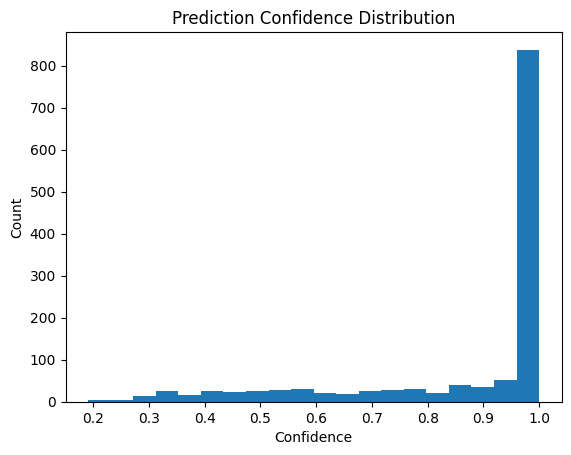

In [113]:
probs = model.predict(X_test)
confidence = np.max(probs, axis=1)

plt.hist(confidence, bins=20)
plt.title("Prediction Confidence Distribution")
plt.xlabel("Confidence")
plt.ylabel("Count")
plt.show()

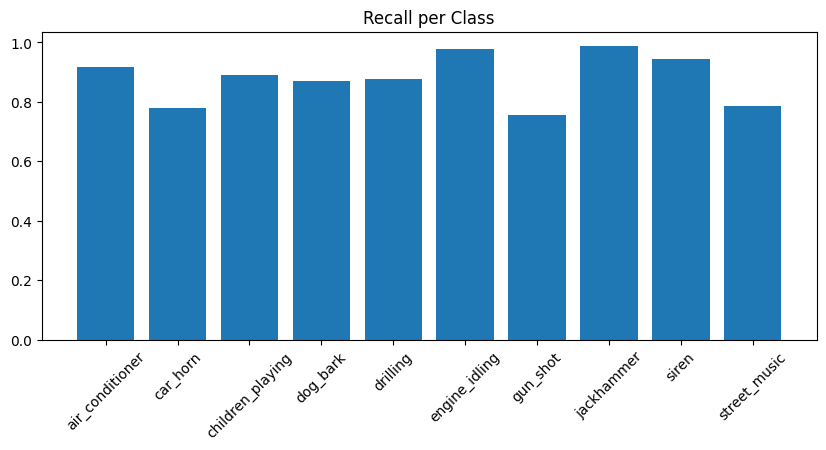

In [114]:
from sklearn.metrics import precision_recall_fscore_support

p, r, f, _ = precision_recall_fscore_support(ytrue, ypred)

plt.figure(figsize=(10,4))
plt.bar(labelencoder.classes_, r)
plt.xticks(rotation=45)
plt.title("Recall per Class")
plt.show()


In [116]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
print("ROC AUC:", roc_auc)


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ROC AUC: 0.9884876071805518


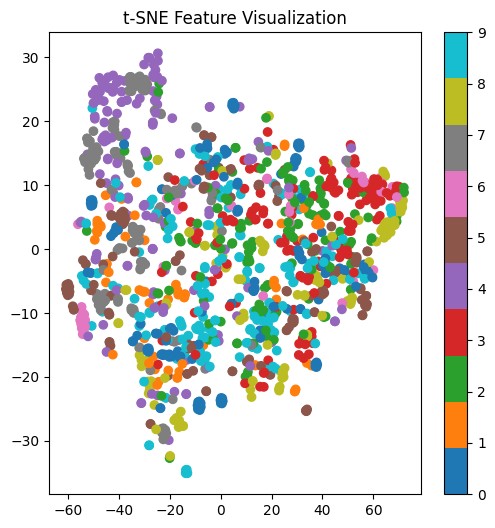

In [117]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(X_test)

plt.figure(figsize=(6,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=ytrue, cmap='tab10')
plt.colorbar()
plt.title("t-SNE Feature Visualization")
plt.show()

In [118]:
model.count_params()

178826